*This repository features projects focused on applying and optimizing various regression techniques, including Linear, Ridge, Lasso, Elastic Net, and Huber Regression. Each project includes hyperparameter tuning and visualizations to enhance understanding.*

*Additionally, a logistic regression model is applied to a heart disease dataset, covering feature engineering, model training, and evaluation through accuracy metrics and ROC curve analysis.*

## Linear Regression

Importing libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
salary_data = pd.read_csv('Salary_Data.csv')

In [4]:
print(salary_data.head(10))

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0


In [5]:
print(salary_data.shape)

(30, 2)


In [6]:
print(salary_data.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


In [10]:
print(salary_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


In [11]:
X = salary_data[['YearsExperience']]
y = salary_data['Salary']

Split the dataset into train and test set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the Simple Linear Regression model on the Training set

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predict the Test set results

In [17]:
y_pred = regressor.predict(X_test)
print(y_pred)

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


**Visualize the linear regression on training data using scatterplot.**

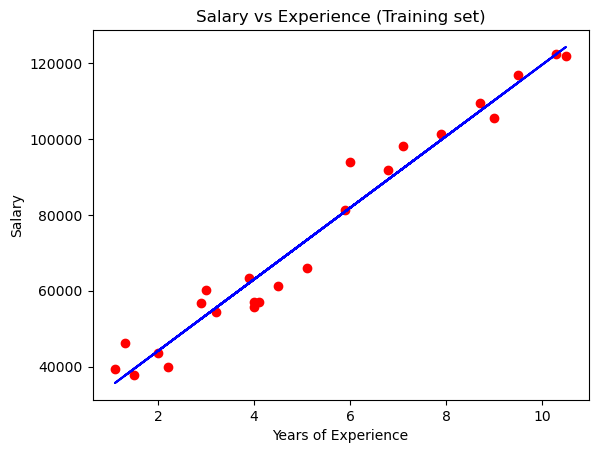

In [18]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Visualize the linear regression on test data using scatterplot.**

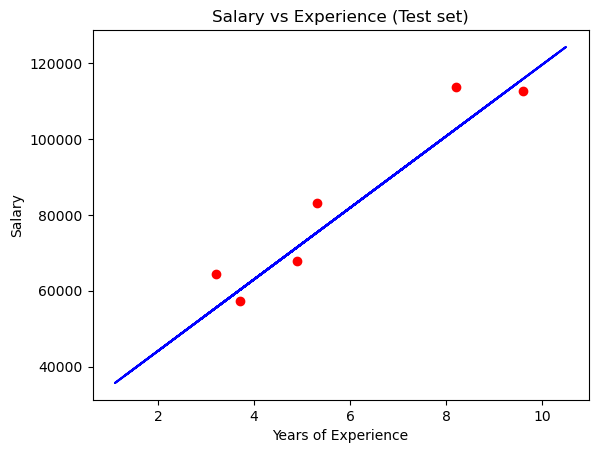

In [20]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Finding R^2 score

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2 = r2_score(y_test, y_pred)
print(f'R^2 score: {r2}')

R^2 score: 0.9024461774180497


## Ridge Regression

In [90]:
X = salary_data[['YearsExperience']]
y = salary_data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

Ridge()

In [26]:
y_pred_ridge = ridge_regressor.predict(X_test)
print(y_pred_ridge)

[115582.53212304  71511.80952173 102455.08283754  75262.50931758
  55571.33538934  60259.71013416]


**Visualize the Ridge regression on training data using scatterplot.**

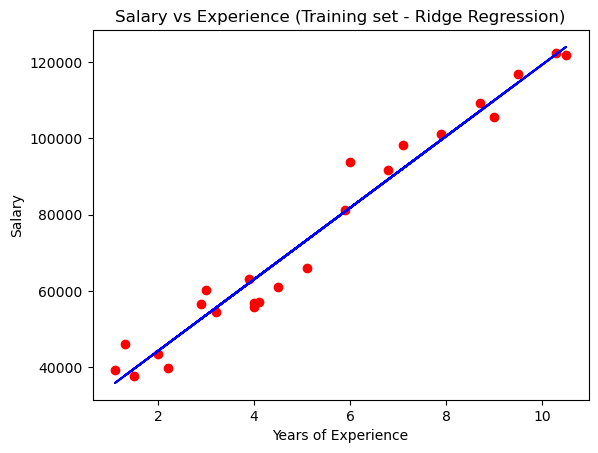

In [28]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, ridge_regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set - Ridge Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Visualize the RIdge regression on test data using scatterplot.**

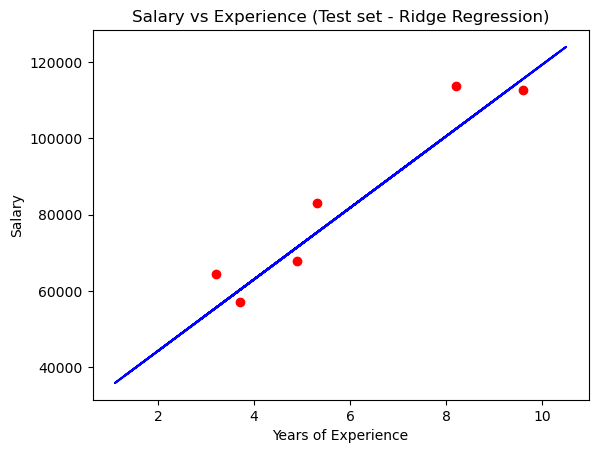

In [30]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, ridge_regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set - Ridge Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [31]:
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'R^2 score (Ridge Regression): {r2_ridge}')

R^2 score (Ridge Regression): 0.9021627846740264


### Ridge Regression Hyperparameter tuning

In [101]:
ridge_params = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.75,0.76,0.77,0.78,0.79,0.8,0.82,0.83,0.85,0.88,0.90,0.91,0.94,0.95,0.99, 1.0]}

ridge_regressor = Ridge()
ridge_grid = GridSearchCV(ridge_regressor, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

print(f"Best Ridge alpha: {ridge_grid.best_params_}")
y_pred_ridge = ridge_grid.predict(X_test)
print(f"R^2 score (Ridge after tuning): {r2_score(y_test, y_pred_ridge)}")

Best Ridge alpha: {'alpha': 0.79}
R^2 score (Ridge after tuning): 0.9022262232928456


## Lasso Regression

In [96]:
X = salary_data[['YearsExperience']]
y = salary_data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(X_train, y_train)

Lasso()

In [35]:
y_pred_lasso = lasso_regressor.predict(X_test)
print(y_pred_lasso)

[115789.67855642  71498.31272862 102596.50575665  75267.79067141
  55478.03147176  60189.87890025]


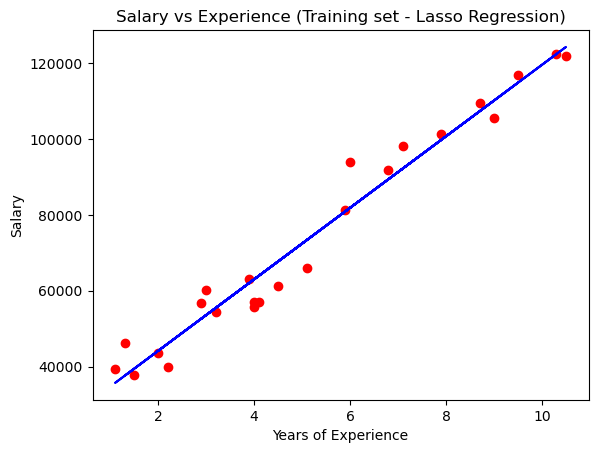

In [36]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lasso_regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set - Lasso Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

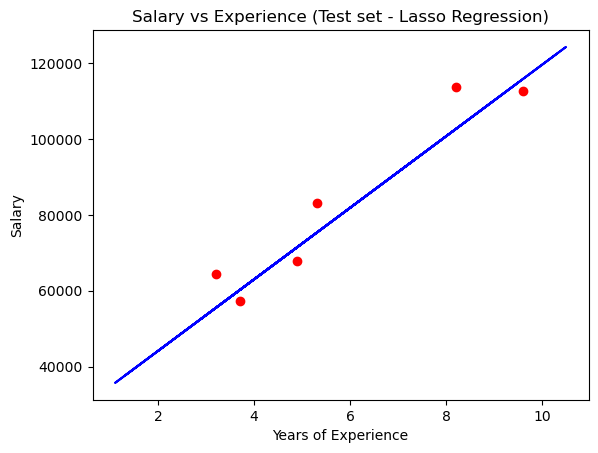

In [37]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, lasso_regressor.predict(X_train), color='blue')  # Regression line stays the same
plt.title('Salary vs Experience (Test set - Lasso Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [102]:
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'R^2 score (Lasso Regression): {r2_lasso}')

R^2 score (Lasso Regression): 0.9024455162895476


### Hyper parameter tuning for lasso regression

In [105]:
lasso_params = {'alpha': [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.90,0.95, 1.0]}

lasso_regressor = Lasso()
lasso_grid = GridSearchCV(lasso_regressor, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

print(f"Best Lasso alpha: {lasso_grid.best_params_}")
y_pred_lasso = lasso_grid.predict(X_test)
print(f"R^2 score (Lasso after tuning): {r2_score(y_test, y_pred_lasso)}")


Best Lasso alpha: {'alpha': 1.0}
R^2 score (Lasso after tuning): 0.9024455162895476


## Elastic Net Regression

In [39]:
X = salary_data[['YearsExperience']]
y = salary_data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import ElasticNet

elasticnet_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio = 0.5 - equal balance between Lasso and Ridge
elasticnet_regressor.fit(X_train, y_train)

ElasticNet()

In [41]:
y_pred_elasticnet = elasticnet_regressor.predict(X_test)
print(y_pred_elasticnet)

[113427.60616874  71652.21546209 100983.87276676  75207.56786266
  56541.96775969  60986.1582604 ]


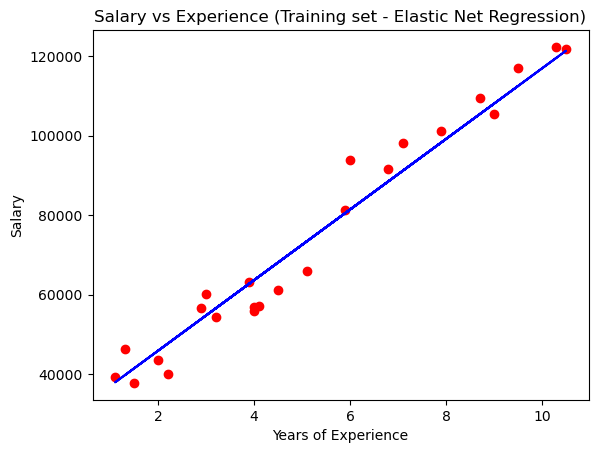

In [42]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, elasticnet_regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set - Elastic Net Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

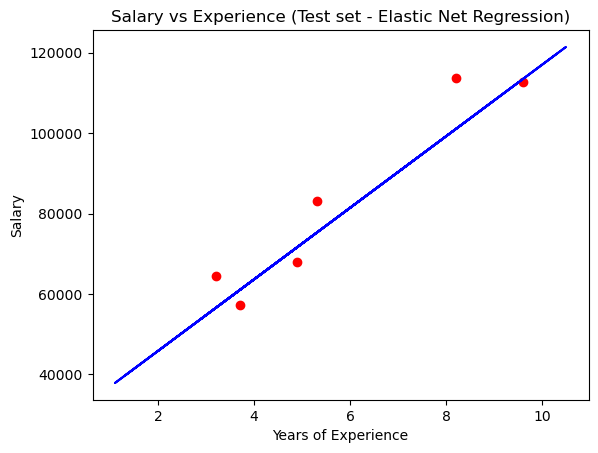

In [43]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, elasticnet_regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set - Elastic Net Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [45]:
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
print(f'R^2 score (Elastic Net Regression): {r2_elasticnet}')

R^2 score (Elastic Net Regression): 0.8962527621642432


### Hyper Parameter Tuning for Elastic Net

In [106]:
elasticnet_params = {
    'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95, 1.0, 10.0],
    'l1_ratio': [0.1,0.2,0.3,0.4, 0.5,0.6,0.7, 0.8,0.9,0.95]
}

elasticnet_regressor = ElasticNet()
elasticnet_grid = GridSearchCV(elasticnet_regressor, elasticnet_params, cv=5, scoring='r2')
elasticnet_grid.fit(X_train, y_train)

print(f"Best ElasticNet parameters: {elasticnet_grid.best_params_}")
y_pred_elasticnet = elasticnet_grid.predict(X_test)
print(f"R^2 score (ElasticNet after tuning): {r2_score(y_test, y_pred_elasticnet)}")


Best ElasticNet parameters: {'alpha': 0.9, 'l1_ratio': 0.95}
R^2 score (ElasticNet after tuning): 0.9021373942132846


## Huber Regression

In [46]:
X = salary_data[['YearsExperience']]
y = salary_data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import HuberRegressor

huber_regressor = HuberRegressor()
huber_regressor.fit(X_train, y_train)

HuberRegressor()

In [49]:
y_pred_huber = huber_regressor.predict(X_test)
print(y_pred_huber)

[115520.63940911  71283.37887652 102343.58308026  75048.25211334
  55282.66762005  59988.75916607]


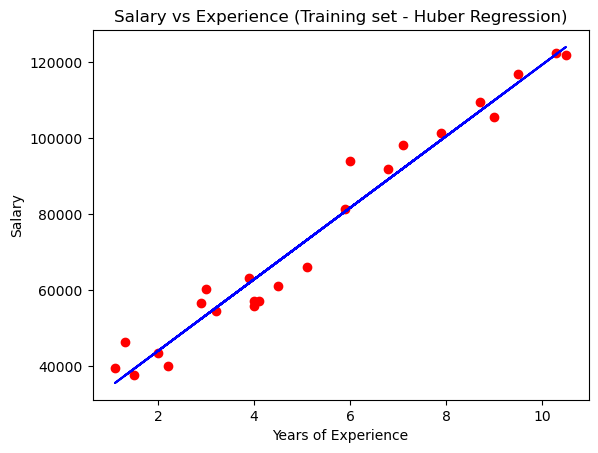

In [50]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, huber_regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set - Huber Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

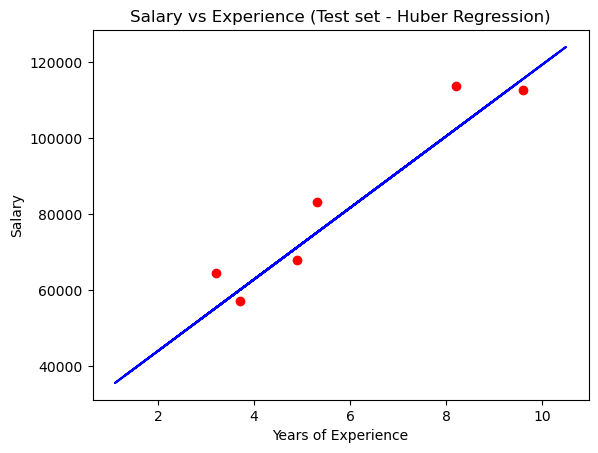

In [51]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, huber_regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set - Huber Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [52]:
r2_huber = r2_score(y_test, y_pred_huber)
print(f'R^2 score (Huber Regression): {r2_huber}')

R^2 score (Huber Regression): 0.8996769658399181


### Hyperparameter tuning for huber Regression

In [107]:
huber_params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'epsilon': [1.0, 1.35, 1.5, 1.75, 2.0]
}

huber_regressor = HuberRegressor()
huber_grid = GridSearchCV(huber_regressor, huber_params, cv=5, scoring='r2')
huber_grid.fit(X_train, y_train)

print(f"Best Huber parameters: {huber_grid.best_params_}")
y_pred_huber = huber_grid.predict(X_test)
print(f"R^2 score (Huber after tuning): {r2_score(y_test, y_pred_huber)}")


Best Huber parameters: {'alpha': 0.0001, 'epsilon': 1.0}
R^2 score (Huber after tuning): 0.9057077531363914


## Logistic Regression

Import Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Read the heart failure dataset

In [75]:
heart_data = pd.read_csv('heart.csv')

Display the first five rows


In [76]:
print(heart_data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


Check for missing values

In [77]:
print(heart_data.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Describe numerical features

In [78]:
print(heart_data.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


Visualize the distribution of key features (Age, Cholesterol, MaxHR) using histograms.

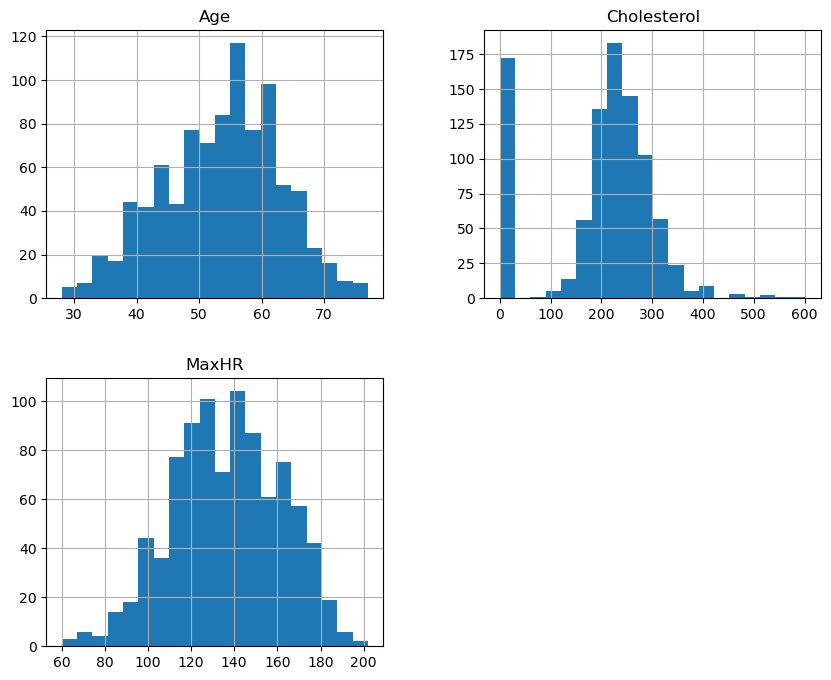

In [79]:
heart_data[['Age', 'Cholesterol', 'MaxHR']].hist(bins=20, figsize=(10, 8))
plt.show()

List all categorical_features

In [80]:
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [82]:
categorical_features=heart_data.select_dtypes(include='object').columns.values
categorical_features

array(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
      dtype=object)

Convert categorical variables into numerical format using label encoding.

In [83]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in categorical_features:
    heart_data[col] = encoder.fit_transform(heart_data[col])

Analyze the correlation between features using a heatmap.

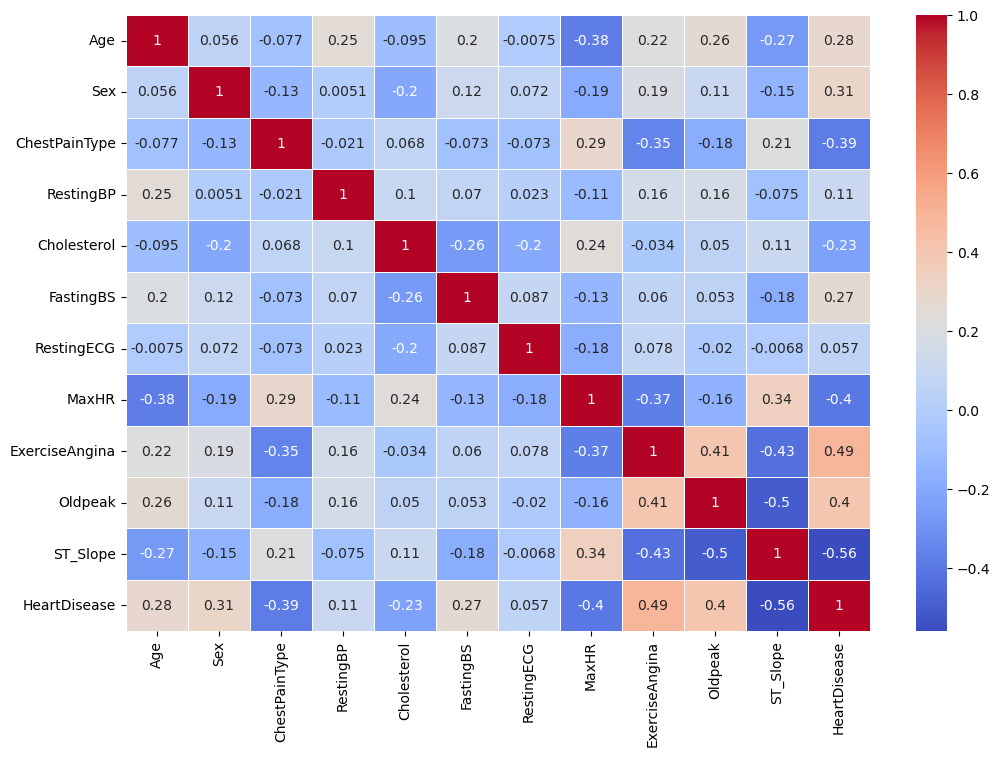

In [84]:
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Split the dataset into training and testing sets (80-20 split).

In [85]:
X = heart_data.drop('HeartDisease', axis=1)
y = heart_data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Perform hyperparameter tuning on logistic regression using GridSearchCV to find the best parameters

In [86]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


Train the logistic regression model using the best parameters obtained from GridSearchCV and evaluate its performance on the test set using accuracy, confusion matrix, and classification report.

In [87]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8478260869565217
[[68  9]
 [19 88]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [88]:
from sklearn.metrics import roc_curve, auc

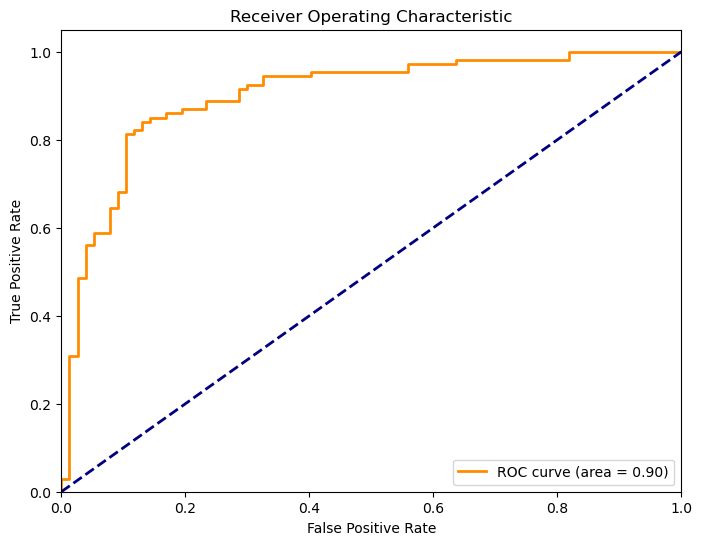

In [89]:
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()